In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
%matplotlib inline

In [7]:
petroleum_release_url = 'https://opendata.arcgis.com/datasets/57759688e4944bb987add68c4f0c5ada_104.csv?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D'
df = pd.read_csv(petroleum_release_url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,X,Y,OBJECTID,PCNUM,CHANGED_BY,CHANGED_DATE,INSERTED_BY,INSERTED_DATE,VERIFIEDBY,VERIFYDATE,REFERENCE_POINT,RST_FAC_ID,RST_NAME,RST_POLL_COMPLAINT_NO,DES_FIRST_NAME,DES_LAST_NAME,RST_REC_CODE,RST_PRIORITY,RST_FED_REG_TANK,RST_STATUS_IND,RST_SUSPECT_CONFIRM_IND,RST_RELEASE_REPORTED,RST_CASE_CLOSED,FAC_LOCATION,FAC_L_ADDR_1,FAC_L_CITY,FAC_L_STATE,FAC_L_ZIP5,FIC_DESCRIPTION,Lat,Lon
0,-8.828708e+06,4.452591e+06,1,19900156,jadaniel,2009/06/09 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,2.000001e+11,BURLINGTON INDUSTRIES INC,19900156.0,Christy,Conch,WCRO,NaN,N,Closed,Confirmed,1989/08/02 00:00:00+00,1989/10/18 00:00:00+00,401 Amherst Ave,401 Amherst Ave,Altavista,VA,24517.0,Campbell County,37.096675,-79.309638
1,-8.621257e+06,4.522766e+06,2,19901233,jatempleton,2006/03/14 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,2.000002e+11,Recreation Parks 506,19901233.0,Transfered to,Library of VA,PRO,3.0,Y,Closed,Confirmed,1990/03/19 00:00:00+00,1994/08/25 00:00:00+00,NaN,810 Forest Lawn Rd,Richmond,VA,23220.0,Richmond City,37.597821,-77.446067
2,-8.624031e+06,4.518069e+06,3,19891250,jatempleton,2006/02/28 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,2.000002e+11,Chasens Business Interiors,19891250.0,Transfered to,Library of VA,PRO,3.0,Y,Closed,Confirmed,1989/04/07 00:00:00+00,1989/05/17 00:00:00+00,NaN,2924 W Marshall St,Richmond,VA,23220.0,Richmond City,37.564380,-77.470984
3,-8.614487e+06,4.519789e+06,4,20004165,jatempleton,2006/03/07 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,2.000002e+11,Wiggins Residence,20004165.0,Transfered to,Library of VA,PRO,3.0,N,Closed,Confirmed,1999/09/29 00:00:00+00,2000/01/28 00:00:00+00,NaN,3104 Skelton St,Richmond,VA,23223.0,Henrico County,37.576630,-77.385257
4,-8.611699e+06,4.547768e+06,5,20004169,jatempleton,2006/04/03 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,1970/01/01 00:00:00+00,NaN,2.000002e+11,Cabin Hill Farm,20004169.0,Transfered to,Library of VA,PRO,3.0,N,Closed,Confirmed,1999/09/29 00:00:00+00,2002/09/11 00:00:00+00,NaN,7423 Normans Bridge Rd,Hanover,VA,23069.0,Hanover County,37.775555,-77.360211


In [9]:
df.shape

(48253, 31)

In [19]:
df_cleaned = df.dropna(subset=['FAC_L_ADDR_1', 'FAC_L_CITY', 'FAC_L_STATE', 'FAC_L_ZIP5'])
df_cleaned["Full_Address"] = df_cleaned.apply(lambda row: row.FAC_L_ADDR_1 + "," + row.FAC_L_CITY + ",VA,United States", axis=1)
df_cleaned["Minimal_Address"] = df_cleaned.apply(lambda row: row.FAC_L_CITY + ",VA,United States", axis=1)
df_cleaned = df_cleaned.drop_duplicates(subset=['Lat', 'Lon'])
df_cleaned.rename(columns={"Lat": "latitude", "Lon": "longitude"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Already contains latitude and longitude data**

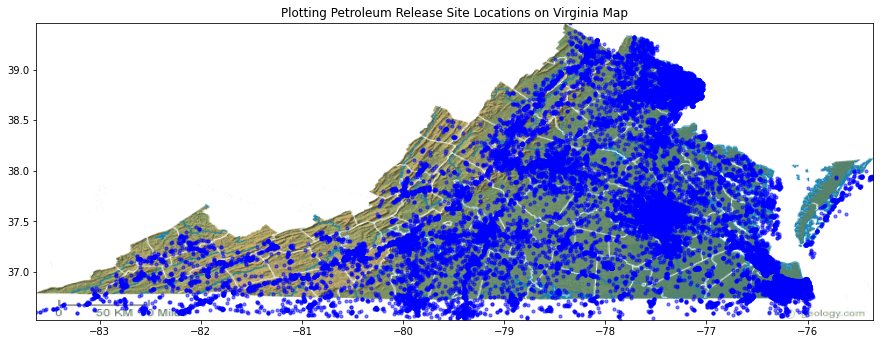

In [27]:
ruh_m = plt.imread('virginia-physical-map.gif')
BBox = ((df_cleaned.longitude.min(),   df_cleaned.longitude.max(),      
         df_cleaned.latitude.min(), df_cleaned.latitude.max()))

fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(df_cleaned.longitude, df_cleaned.latitude, zorder=1, alpha= 0.5, c='b', s=10)
ax.set_title('Plotting Petroleum Release Site Locations on Virginia Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [28]:
df_final = df_cleaned[["RST_NAME", "FIC_DESCRIPTION", "Full_Address", "Minimal_Address", "latitude", "longitude"]]
df_final.to_pickle("petroleum_release.pkl")